In [1]:
# Import Libraries:
import pandas as pd
import numpy as np
import seaborn as sbn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

For this tutorial, we'll be using the Orange Telecoms Churn Dataset. It consists of cleaned customer activity data (features), along with a churn label specifying whether the customer canceled their subscription or not. The data can be fetched from BigML's S3 bucket, churn-80 and churn-20. The two sets are from the same batch, but have been split by an 80/20 ratio. We'll use the larger set for training and cross-validation purposes, and the smaller set for final testing and model performance evaluation. The two data sets have been included in this repository for convenience.

Let's load the two CSV data sets into DataFrames, keeping the header information and caching them into memory for quick, repeated access. We'll also print the schema of the sets.

In [2]:
# Load Data:
data = pd.read_csv('Copy of churn-bigml-80.csv')
final_test_data = pd.read_csv('Copy of churn-bigml-20.csv')

In [3]:
print('Size of churn-bigml-80', data.shape)
print('Size of churn-bigml-20', final_test_data.shape)

Size of churn-bigml-80 (2666, 20)
Size of churn-bigml-20 (667, 20)


By taking 5 rows of the CV_data variable and generating a Pandas DataFrame with them, we can get a display of what the rows look like. 

In [4]:
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

The describe() function performs summary statistics calculations on all numeric columns, and returns them as a DataFrame.

In [6]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [8]:
# checking missing data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
State,0,0.0
Account length,0,0.0
Customer service calls,0,0.0
Total intl charge,0,0.0
Total intl calls,0,0.0
Total intl minutes,0,0.0
Total night charge,0,0.0
Total night calls,0,0.0
Total night minutes,0,0.0
Total eve charge,0,0.0


In [9]:
# checking missing data
total = final_test_data.isnull().sum().sort_values(ascending = False)
percent = (final_test_data.isnull().sum()/final_test_data.isnull().count()*100).sort_values(ascending = False)
missing_final_test_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_final_test_data.head(20)

,Total,Percent
State,0,0.0
Account length,0,0.0
Customer service calls,0,0.0
Total intl charge,0,0.0
Total intl calls,0,0.0
Total intl minutes,0,0.0
Total night charge,0,0.0
Total night calls,0,0.0
Total night minutes,0,0.0
Total eve charge,0,0.0


In [10]:
data['Churn'] = data['Churn'].astype("int64")

In [11]:
data.describe(include=["object", "bool"])

,State,International plan,Voice mail plan
count,2666,2666,2666
unique,51,2,2
top,WV,No,No
freq,88,2396,1933


what is the proportion of churned users in our dataframe?

In [12]:
data["Churn"].mean()

0.145536384096024

Perform statistical analysis using the MLlib statistical package or other python packages. Here, we use the Pandas library to check the correlation between columns of numbers by creating scatter plots of them.

In [ ]:
numeric_features = data.select_dtypes(include=[int, float])

sampled_data = numeric_features.sample(frac=0.10, replace=False)

axs = pd.plotting.scatter_matrix(sampled_data, figsize=(12, 12))

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

What are average values of numerical features for churned users?

Distribution of Churn Across Different States

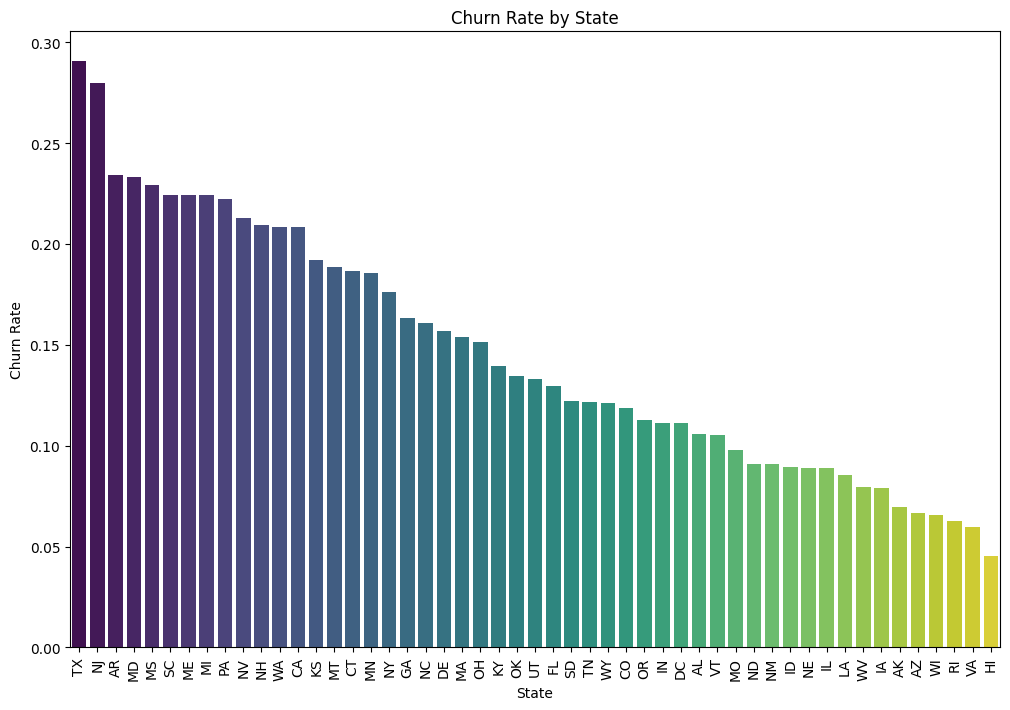

In [13]:

plt.figure(figsize=(12, 8))
churn_by_state = data.groupby('State')['Churn'].mean().sort_values(ascending=False)
sns.barplot(x=churn_by_state.index, y=churn_by_state.values, palette='viridis')
plt.title('Churn Rate by State')
plt.ylabel('Churn Rate')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()


Churn Rates for Customers with International Plans

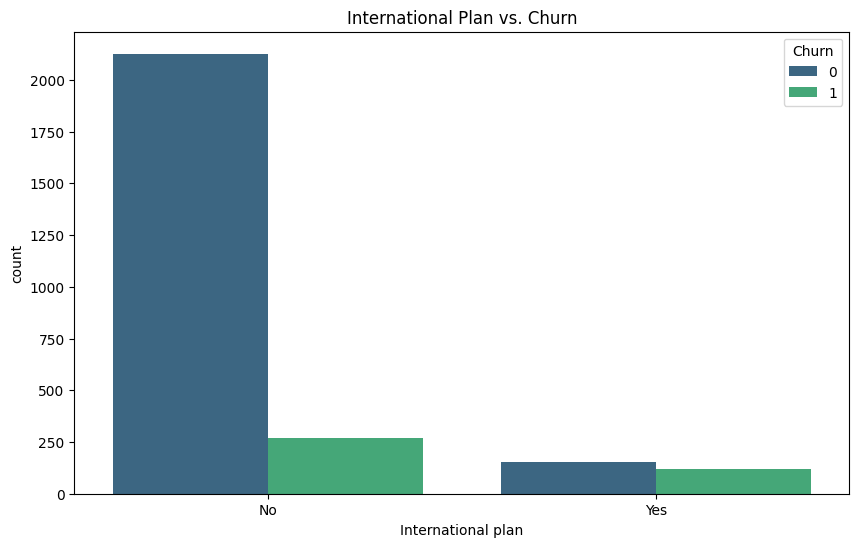

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='International plan', hue='Churn', palette='viridis')
plt.title('International Plan vs. Churn')
plt.show()

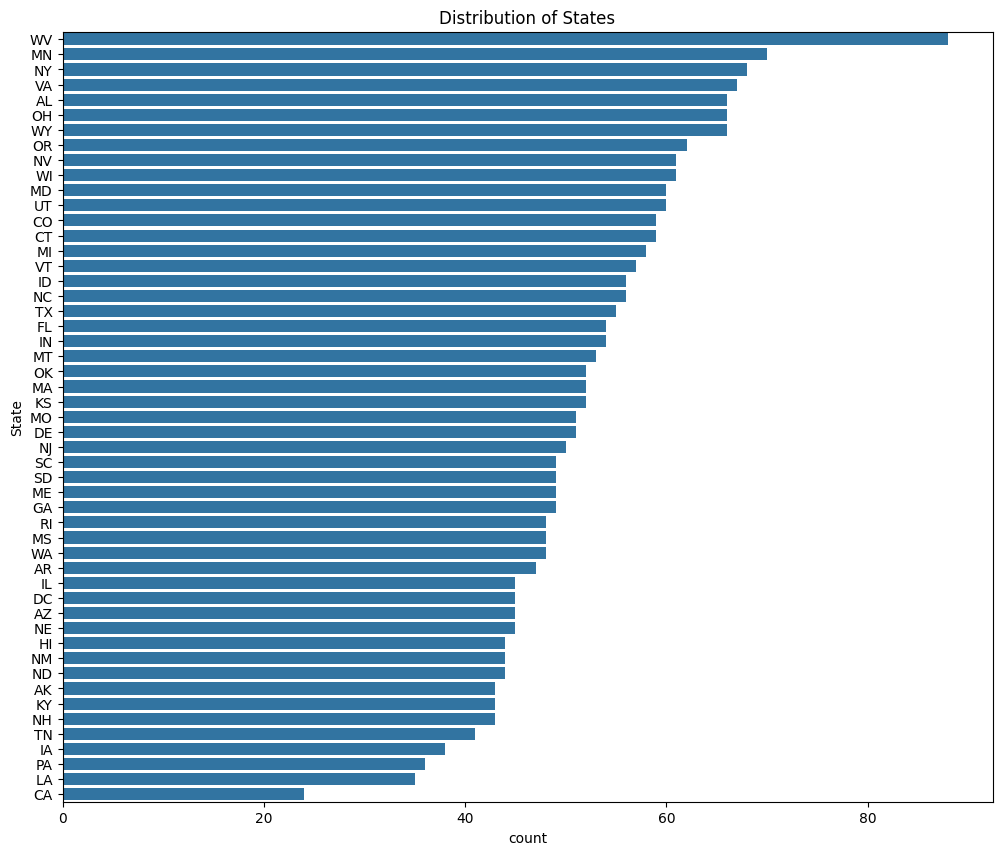

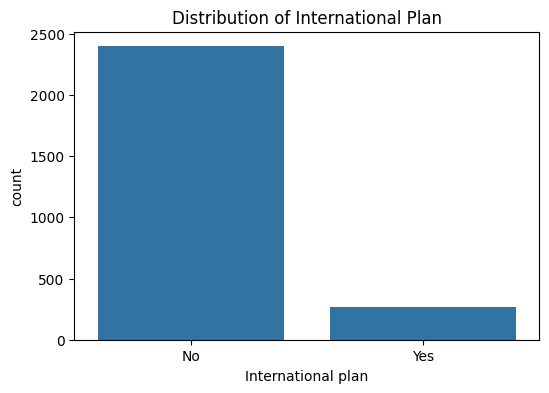

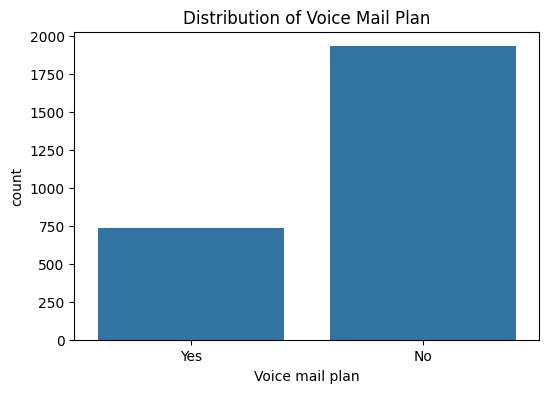

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'State'
plt.figure(figsize=(12, 10))
sns.countplot(y='State', data=data, order=data['State'].value_counts().index)
plt.title('Distribution of States')
plt.show()

# Distribution of 'International plan'
plt.figure(figsize=(6, 4))
sns.countplot(x='International plan', data=data)
plt.title('Distribution of International Plan')
plt.show()

# Distribution of 'Voice mail plan'
plt.figure(figsize=(6, 4))
sns.countplot(x='Voice mail plan', data=data)
plt.title('Distribution of Voice Mail Plan')
plt.show()

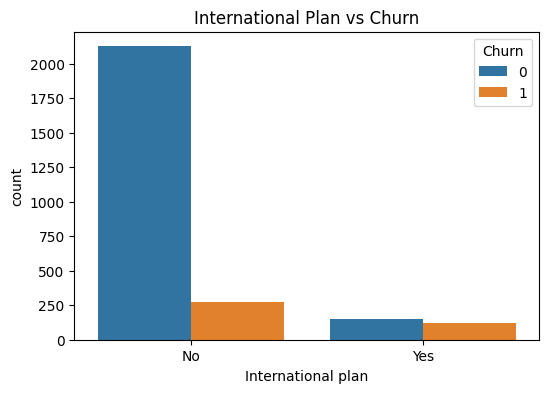

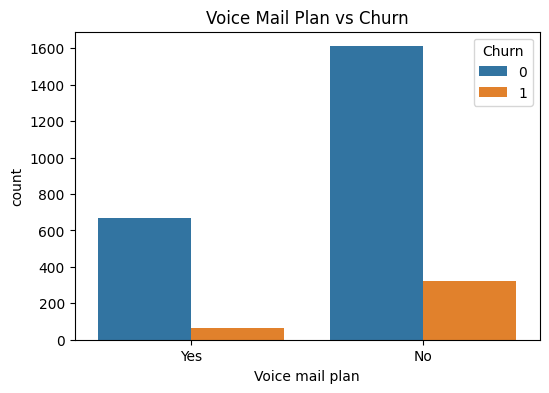

In [16]:
import seaborn as sns

# Relationship between 'International plan' and 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='International plan', hue='Churn', data=data)
plt.title('International Plan vs Churn')
plt.show()

# Relationship between 'Voice mail plan' and 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Voice mail plan', hue='Churn', data=data)
plt.title('Voice Mail Plan vs Churn')
plt.show()


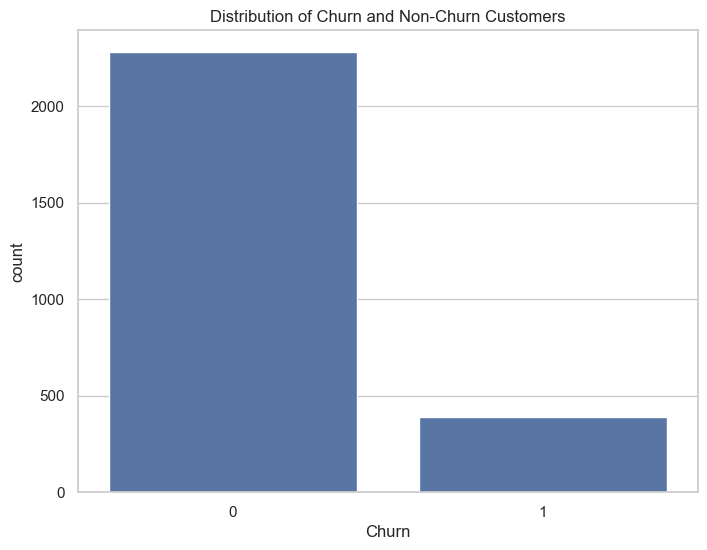

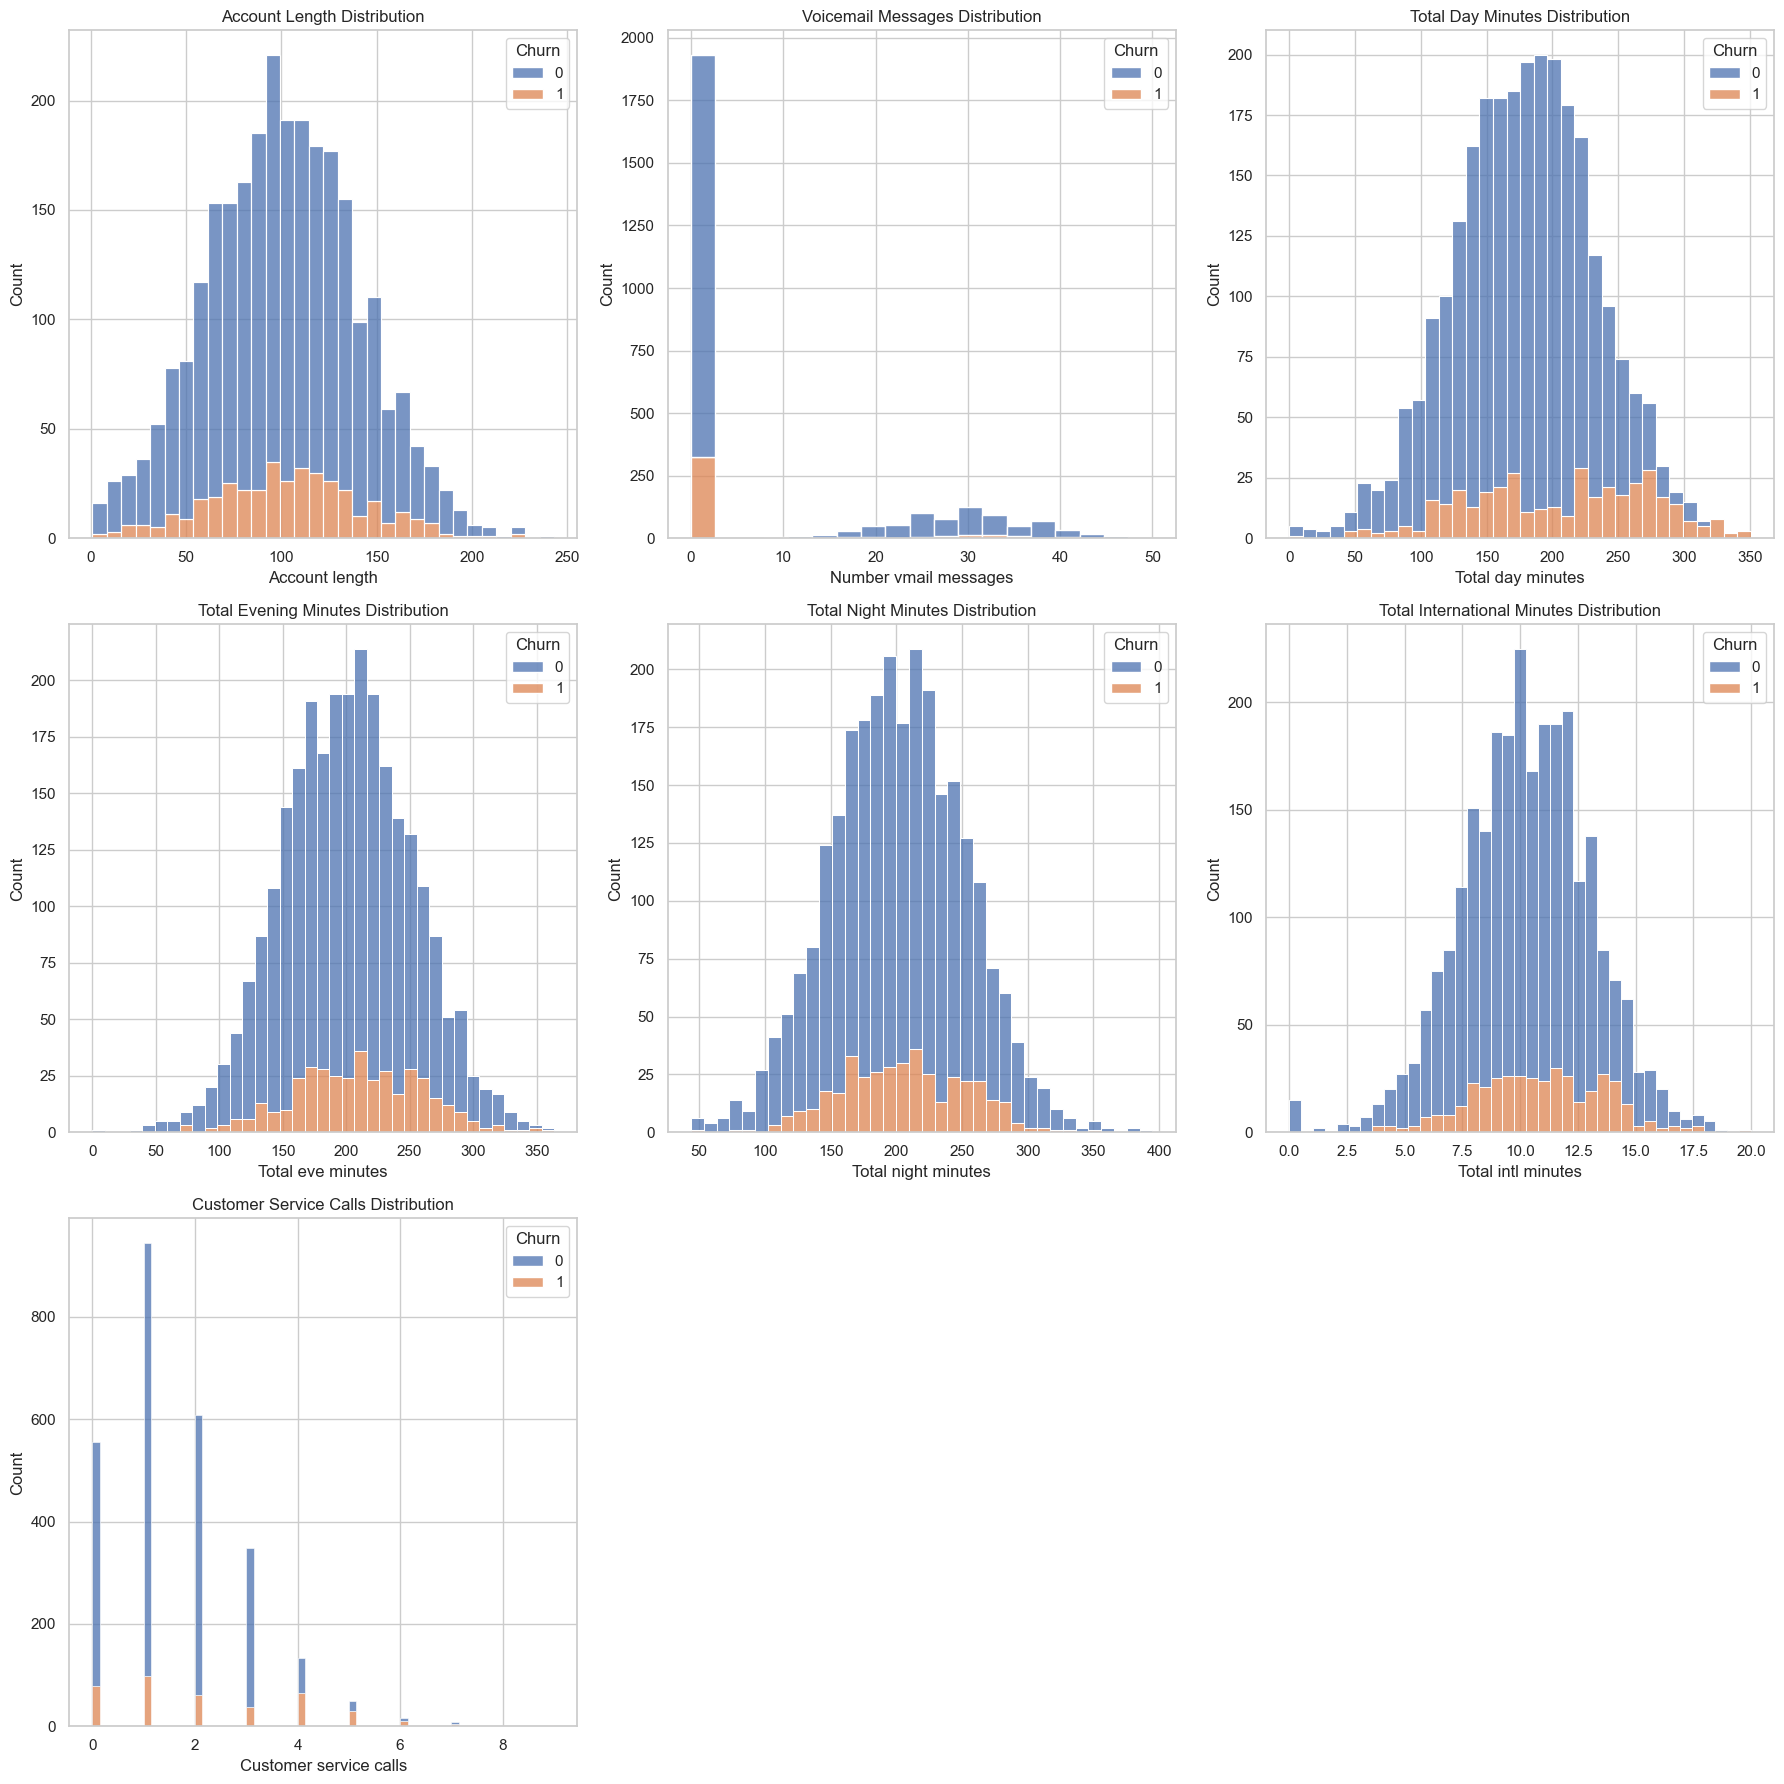

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn and Non-Churn Customers')
plt.show()

# Characteristics comparison
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Account Length
sns.histplot(data=data, x='Account length', hue='Churn', multiple='stack', ax=axes[0, 0])
axes[0, 0].set_title('Account Length Distribution')

# Voicemail Messages
sns.histplot(data=data, x='Number vmail messages', hue='Churn', multiple='stack', ax=axes[0, 1])
axes[0, 1].set_title('Voicemail Messages Distribution')

# Total Day Minutes
sns.histplot(data=data, x='Total day minutes', hue='Churn', multiple='stack', ax=axes[0, 2])
axes[0, 2].set_title('Total Day Minutes Distribution')

# Total Evening Minutes
sns.histplot(data=data, x='Total eve minutes', hue='Churn', multiple='stack', ax=axes[1, 0])
axes[1, 0].set_title('Total Evening Minutes Distribution')

# Total Night Minutes
sns.histplot(data=data, x='Total night minutes', hue='Churn', multiple='stack', ax=axes[1, 1])
axes[1, 1].set_title('Total Night Minutes Distribution')

# Total International Minutes
sns.histplot(data=data, x='Total intl minutes', hue='Churn', multiple='stack', ax=axes[1, 2])
axes[1, 2].set_title('Total International Minutes Distribution')

# Total Customer Service Calls
sns.histplot(data=data, x='Customer service calls', hue='Churn', multiple='stack', ax=axes[2, 0])
axes[2, 0].set_title('Customer Service Calls Distribution')

# Hide the last two plots (unused)
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()


It's obvious that there are several highly correlated fields, ie Total day minutes and Total day charge. Such correlated data won't be very beneficial for our model training runs, so we're going to remove them. We'll do so by dropping one column of each pair of correlated fields, along with the State and Area code columns.



In [19]:
data = data.drop(columns=['State', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']) 

final_test_data = final_test_data.drop(columns=['State', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']) 




While we are in the process of manipulating the datasets, let's convert the categorical data to numbers as required by the machine learning pipeline, using a simple user-defined function to map Yes /True and No/False become 1 and 0, respectively.

In [20]:
# Map Binary Values:
binary_map = {'Yes':1.0, 'No':0.0, 'True':1.0, 'False':0.0}

columns_to_convert = ['International plan', 'Voice mail plan']

data[columns_to_convert] = data[columns_to_convert].apply((lambda col: col.map(binary_map)))
final_test_data[columns_to_convert] = final_test_data[columns_to_convert].apply((lambda col: col.map(binary_map)))
# Convert Churn Column to Integer:
data['Churn'] = data['Churn'].astype("int64")
final_test_data['Churn'] = final_test_data['Churn'].astype("int64")

Let's take a quick look at the resulting data set.

In [21]:
data

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,0.0,1.0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0.0,1.0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0.0,0.0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,1.0,0.0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,1.0,0.0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0.0,0.0,0,134.7,98,189.7,68,221.4,128,11.8,5,2,0
2662,192,0.0,1.0,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0
2663,68,0.0,0.0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
2664,28,0.0,0.0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0


# Decision Tree Models

Decision trees have played a significant role in data mining and machine learning since the 1960's. They generate white-box classification and regression models which can be used for feature selection and sample prediction. The transparency of these models is a big advantage over black-box learners, because the models are easy to understand and interpret, and they can be readily extracted and implemented in any programming language (with nested if-else statements) for use in production environments. Furthermore, decision trees require almost no data preparation (ie normalization) and can handle both categorical and continuous data. To remedy over-fitting and improve prediction accuracy, decision trees can also be limited to a certain depth or complexity, or bundled into ensembles of trees (ie random forests).

A decision tree is a predictive model which maps observations (features) about an item to conclusions about the item's label or class. The model is generated using a top-down approach, where the source dataset is split into subsets using a statistical measure, often in the form of the Gini index or information gain via Shannon entropy. This process is applied recursively until a subset contains only samples with the same target class, or is halted by a predefined stopping criteria.

### Model Training


The custom labelData() function shown below performs the row parsing. We'll pass it the prepared data set (data) and split it further into training and testing sets. A decision tree classifier model is then generated using the training data, using a maxDepth of 2, to build a "shallow" tree. The tree depth can be regarded as an indicator of model complexity.

In [22]:
# Label Data Function:
def label_data(data):
    # label: row[end], features: row[0:end-1]
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return X, y

X, y = label_data(data)

# Split Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Train Decision Tree Classifier:
model_tree = DecisionTreeClassifier(max_depth=2, criterion='gini')
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [24]:
# Print the tree structure
tree_structure = tree.export_text(model_tree, feature_names=list(X.columns))
print("Tree structure:")
print(tree_structure)

Tree structure:
|--- Total day minutes <= 264.40
|   |--- Customer service calls <= 3.50
|   |   |--- class: 0
|   |--- Customer service calls >  3.50
|   |   |--- class: 0
|--- Total day minutes >  264.40
|   |--- Number vmail messages <= 6.50
|   |   |--- class: 1
|   |--- Number vmail messages >  6.50
|   |   |--- class: 0



### Model Evaluation

In [25]:
# Make predictions on the test data
y_pred = model_tree.predict(X_test)

In [26]:
# Print metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       455
           1       0.83      0.19      0.31        79

    accuracy                           0.87       534
   macro avg       0.85      0.59      0.62       534
weighted avg       0.87      0.87      0.84       534



The overall accuracy, ie F-1 score, seems quite good, but one troubling issue is the discrepancy between the recall measures. The recall (aka sensitivity) for the Churn=False samples is high, while the recall for the Churn=True examples is relatively low. Business decisions made using these predictions will be used to retain the customers most likely to leave, not those who are likely to stay. Thus, we need to ensure that our model is sensitive to the Churn=True samples.

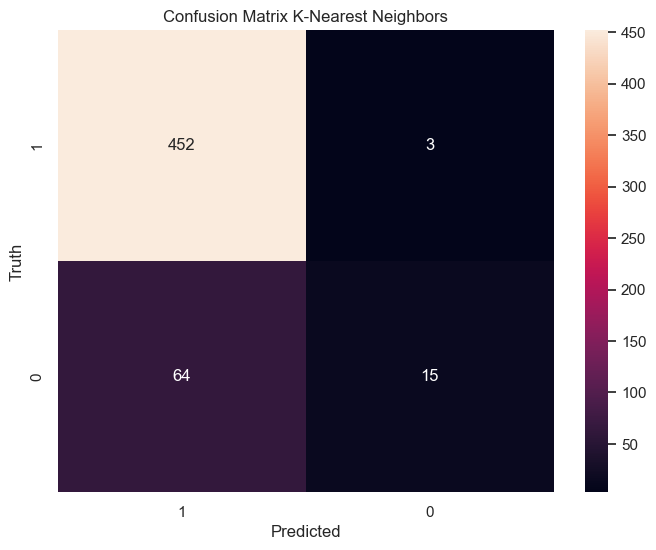

In [27]:
#confusion matrix
cm_tree = confusion_matrix(y_test, y_pred)
labels = y_test.unique()

plt.figure(figsize=(8,6))
sbn.heatmap(cm_tree, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix K-Nearest Neighbors')
plt.show()

Perhaps the model's sensitivity bias toward Churn=False samples is due to a skewed distribution of the two types of samples. Let's try grouping the data DataFrame by the Churn field and counting the number of instances in each group.

In [28]:
data.groupby('Churn').size().reset_index(name='count')

,Churn,count
0,0,2278
1,1,388


### Stratified Sampling

There are roughly 6 times as many False churn samples as True churn samples. We can put the two sample types on the same footing using stratified sampling.

Here we're keeping all instances of the Churn=True class, but downsampling the Churn=False class to a fraction of 388/2278.

In [29]:
# Perform stratified sampling
fractions = {0: 388. / 2278, 1: 1.0}
stratified_data = data.groupby('Churn').apply(lambda x: x.sample(frac=fractions[x.name], random_state=42)).reset_index(drop=True)

# Group by 'Churn' and count the occurrences
churn_counts = stratified_data.groupby('Churn').size().reset_index(name='count')

print(churn_counts)

   Churn  count
0      0    388
1      1    388


Let's build a new model using the evenly distributed data set and see how it performs.

In [30]:
# Split the data into features and labels
X1, y1 = label_data(stratified_data)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=2, criterion='gini')
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_1 = tree_model.predict(X_test)

# Print metrics
print(classification_report(y_test, y_pred_1))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_1))


              precision    recall  f1-score   support

           0       0.65      0.85      0.73        78
           1       0.78      0.54      0.64        78

    accuracy                           0.69       156
   macro avg       0.71      0.69      0.68       156
weighted avg       0.71      0.69      0.68       156

Confusion Matrix:
 [[66 12]
 [36 42]]


With these new recall values, we can see that the stratified data was helpful in building a less biased model, which will ultimately provide more generalized and robust predictions.

### Model Selection

Given the data set at hand, we would like to determine which parameter values of the decision tree produce the best model. We need a systematic approach to quantatively measure the performance of the models and ensure that the results are reliable. This task of model selection is often done using cross validation techniques. A common technique is k-fold cross validation, where the data is randomly split into k partitions. Each partition is used once as the testing data set, while the rest are used for training. Models are then generated using the training sets and evaluated with the testing sets, resulting in k model performance measurements. The average of the performance scores is often taken to be the overall score of the model, given its build parameters.

For model selection we can search through the model parameters, comparing their cross validation performances. The model parameters leading to the highest performance metric produce the best model.

The ML package supports k-fold cross validation, which can be readily coupled with a parameter grid builder and an evaluator to construct a model selection workflow. Below, we'll use a transformation/estimation pipeline to train our models. The cross validator will use the ParamGridBuilder to iterate through the maxDepth parameter of the decision tree and evaluate the models using the F1-score, repeating 3 times per parameter value for reliable results.

In [31]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Create a pipeline with a scaler, vectorizer, and decision tree classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

# Define the parameter grid
param_grid = {
    'classifier__max_depth': [2, 3, 4, 5, 6, 7]
}

# Set F1 score as evaluation metric for best model selection
scorer = make_scorer(f1_score, average='weighted')

# Set up grid search 
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=3)

# Fit the model
grid_search.fit(X_train, y_train)

# Fetch the best model
best_model = grid_search.best_estimator_.named_steps['classifier']
print(best_model)

# Evaluate the model on the test data
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score on Test Data: {f1}')

DecisionTreeClassifier(max_depth=5)
F1 Score on Test Data: 0.852558043969591


We find that the best tree model produced using the cross-validation process is one with a depth of 5. So we can assume that our initial "shallow" tree of depth 2 in the previous section was not complex enough, while trees of depth higher than 5 overfit the data and will not perform well in practice.

### Predictions and Model Evaluation

The actual performance of the model can be determined using the final_test_data set which has not been used for any training or cross-validation activities. We'll transform the test set with the model pipeline, which will map the labels and features according to the same recipe. The evaluator will provide us with the F-1 score of the predictions, and then we'll print them along with their probabilities. 


In [32]:
# Split the final test data into features and labels
X_final_test, y_final_test = label_data(final_test_data)

# Encode the labels using the same label encoder
y_final_test_encoded = label_encoder.transform(y_final_test)

# Use the trained pipeline to transform the test data and make predictions
pipeline = grid_search.best_estimator_

# Make predictions on the final test data
y_final_test_pred = pipeline.predict(X_final_test)

# Evaluate the model
accuracy = accuracy_score(y_final_test_encoded, y_final_test_pred)
f1 = f1_score(y_final_test_encoded, y_final_test_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1 Score:', f1)

# Create a DataFrame with predictions and probabilities
probabilities = pipeline.predict_proba(X_final_test)
predictions_df = pd.DataFrame({
    'Actual': y_final_test_encoded,
    'Predicted': y_final_test_pred,
    'Probability_0': probabilities[:, 0],
    'Probability_1': probabilities[:, 1]
})

print(predictions_df)


Accuracy: 0.8830584707646177
F1 Score: 0.8914152270507213
     Actual  Predicted  Probability_0  Probability_1
0         0          0       0.900524       0.099476
1         1          1       0.000000       1.000000
2         1          1       0.125000       0.875000
3         0          0       0.900524       0.099476
4         0          0       0.900524       0.099476
..      ...        ...            ...            ...
662       0          0       0.900524       0.099476
663       0          0       0.900524       0.099476
664       0          0       0.761905       0.238095
665       0          0       0.900524       0.099476
666       0          0       0.928571       0.071429

[667 rows x 4 columns]


The prediction probabilities can be very useful in ranking customers by their likeliness to defect. This way, the limited resources available to the business for retention can be focused on the appropriate customers.

Churn Rate: 0.145536384096024
Average Customer Service Calls (Churn): 2.2061855670103094
Average Customer Service Calls (No Churn): 1.4530289727831431
Average Total Day Charge (Churn): 34.88134020618557
Average Total Day Charge (No Churn): 29.768266022827042

Correlation analysis:
Churn                     1.000000
International plan        0.277489
Customer service calls    0.202590
Total day charge          0.195689
Total day minutes         0.195688
Total intl charge         0.086216
Total intl minutes        0.086204
Total eve minutes         0.072906
Total eve charge          0.072893
Total night minutes       0.033639
Total night charge        0.033635
Total day calls           0.018290
Account length            0.017728
Total night calls         0.012262
Total eve calls          -0.001539
Total intl calls         -0.069882
Number vmail messages    -0.086474
Voice mail plan          -0.099291
Name: Churn, dtype: float64
Accuracy: 0.9101123595505618
Classification Report:
        

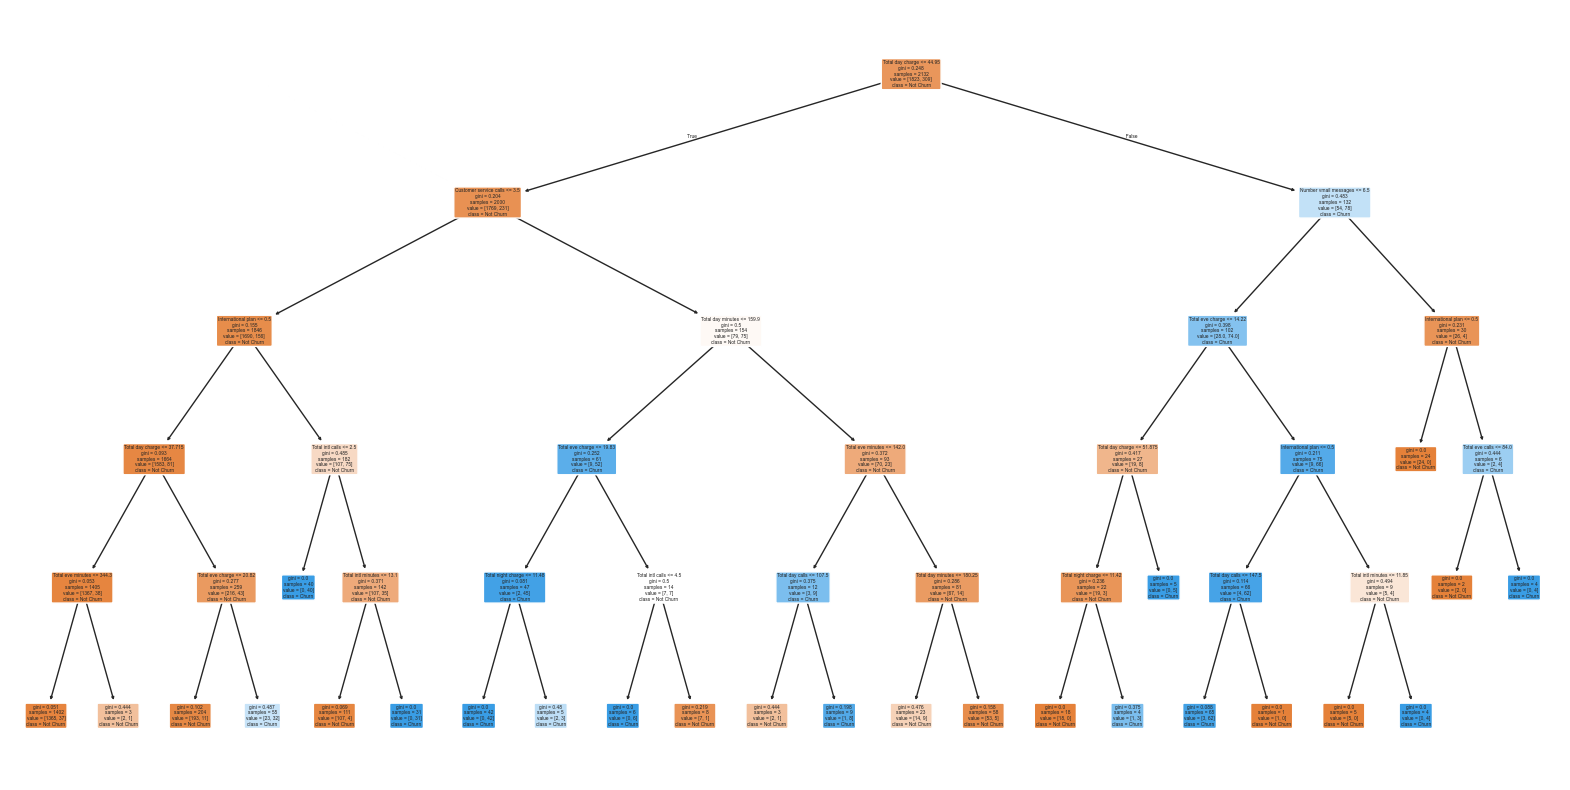


Feature importances:
Total day charge          0.193050
International plan        0.140970
Total intl minutes        0.135492
Customer service calls    0.126121
Total eve charge          0.115524
Total intl calls          0.111425
Total day minutes         0.082277
Number vmail messages     0.044519
Total eve minutes         0.020612
Total night charge        0.013997
Total day calls           0.008711
Total eve calls           0.007302
Total night calls         0.000000
Total night minutes       0.000000
Voice mail plan           0.000000
Total intl charge         0.000000
Account length            0.000000
dtype: float64


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

# Load the dataset
df = pd.read_csv('Copy of churn-bigml-80.csv')

# Mapping categorical variables to numerical values
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Descriptive statistics
churn_rate = df['Churn'].mean()
avg_service_calls_churn = df[df['Churn'] == True]['Customer service calls'].mean()
avg_service_calls_no_churn = df[df['Churn'] == False]['Customer service calls'].mean()
avg_day_charge_churn = df[df['Churn'] == True]['Total day charge'].mean()
avg_day_charge_no_churn = df[df['Churn'] == False]['Total day charge'].mean()

# Print descriptive statistics
print(f'Churn Rate: {churn_rate}')
print(f'Average Customer Service Calls (Churn): {avg_service_calls_churn}')
print(f'Average Customer Service Calls (No Churn): {avg_service_calls_no_churn}')
print(f'Average Total Day Charge (Churn): {avg_day_charge_churn}')
print(f'Average Total Day Charge (No Churn): {avg_day_charge_no_churn}')
df = df.drop(columns=['State', 'Area code'])

# Correlation analysis
correlation_matrix = df.corr()
print("\nCorrelation analysis:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

# Preparing data for model
X = df.drop(columns=['Churn'])
y = df['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Decision Tree model
clf = DecisionTreeClassifier(random_state=42, max_depth= 5)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report_result)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print("\nFeature importances:")
print(feature_importances)
